<!-- <div align="center">

# **Income Inequality**  
### *Collaborators: Nandan Prince & Ayman Sayed*

---

## **What Is World Inequality?**

World inequality captures the disparities in income and wealth across populations and nations. One intuitive entry point is the **share of national income accruing to the top 10%**, a measure that reflects the concentration of economic advantage.

---

## **Metrics Used to Assess Inequality**

### **Top 10% Wealth Share**
A disproportionately large share (e.g., >60%) held by the richest 10% signals structural inequality.

### **Gini Index**
A scalar summary measure:

- **0 → perfect equality**  
- **1 → perfect inequality**

---

## **Scope of This Analysis**

We:

1. Construct a **global Gini Index map** to identify representative countries.  
2. Gather **income distribution data** (WID.world) and **macroeconomic indicators** (World Bank).  
3. Analyze trends in:
   - GDP per capita  
   - Unemployment  
   - Trade openness  
   - Inflation  
   - Population  
   - PPP→USD conversions  
   - Official exchange rates  
4. Produce a **clean, harmonized multi-source panel** for cross-country inequality analysis.

</div> -->


<div align="center">

# <span style="font-size:42px; font-weight:700;">Income Inequality: A Cross-Country Empirical Analysis</span>  
### <span style="font-size:16px;">Collaborators: <b>Nandan Prince</b> (12291799) & <b>Ayman Sayed</b> (122109421)</span>

---

## <span style="font-size:22px; font-weight:600;">Understanding the Global Landscape of Inequality</span>

Income inequality captures how unevenly the economic gains of a nation are distributed among its people.  
In most societies, a relatively small proportion of individuals hold a disproportionately large share of total income.  
A simple yet powerful indicator of this imbalance is the **share of national income accruing to the richest 10%**.  
The larger this share, the smaller the portion available to the remaining 90%, thereby signaling deeper structural divides.

To complement this distributional view, economists rely on the **Gini Index**, a scalar measure between **0 (perfect equality)** and **1 (perfect inequality)**.  
Together, these metrics provide a multi-layered picture of how income is partitioned across populations.

---

</div>

## <span style="font-size:22px; font-weight:600;">Why Measure Inequality?</span>

Inequality is not merely a moral or political issue—it is closely intertwined with:

- **economic growth**,  
- **labor market structure**,  
- **trade openness**,  
- **inflation dynamics**,  
- **population pressures**, and  
- **globalization and financial integration**.

Understanding inequality therefore requires embedding distributional data inside broader macroeconomic context.  
This project attempts to do exactly that.

---

## <span style="font-size:22px; font-weight:600;">Project Overview and Research Workflow</span>

This analysis integrates **distributional income data**, **macroeconomic indicators**, and **cross-country time-series modeling** to understand how inequality evolves and what economic factors accompany it.

### **1. Mapping Global Inequality**
We begin by constructing an **interactive global choropleth** of the Gini Index using Plotly, visualizing inequality levels across all reporting nations.  
From this global landscape, we identify six representative countries for deeper study:

**India, China, United States, Germany, South Africa, Netherlands**

These countries span diverse regions, economic systems, development stages, and inequality levels.

---

### **2. Data Collection from Authoritative Sources**

To study inequality in both absolute and relative terms, we combine:

- **WID.world (World Inequality Database)**  
  - Income distribution shares  
  - Percentile-level inequality (Bottom 50%, Top 10%, Top 1%, Top 0.1%)

- **World Bank World Development Indicators**  
  - GDP per capita (constant USD)  
  - Unemployment rate  
  - Trade (% of GDP)  
  - Inflation (%)  
  - Population  
  - PPP → USD conversion factors  
  - Official exchange rates  

This dual-source approach couples **distributional economics** with **macroeconomic structure**.

---

### **3. Data Cleaning and Harmonization**

We construct a unified analysis panel by:

- Aligning years across datasets  
- Converting national incomes to:
  - **Real USD terms**  
  - **PPP-adjusted income**  
  - **Exchange-rate-adjusted income**  
- Computing **net income share curves** analogous to Lorenz curves  
- Filling missing values through interpolation where appropriate  

This ensures comparability across time and across countries.

---

### **4. Exploratory and Visual Analysis**

For each selected country, we generate:

- **Income-share bars** contrasting Bottom 50%, Top 10%, and Top 1%  
- **Lorenz curves** showing distributional inequality over time  
- **Net income share curves** illustrating absolute income accumulation across population groups
- **Correlation matrices** linking inequality with macroeconomic indicators  

These visual tools allow readers to observe:

- whether inequality is widening or narrowing,  
- how economic growth interacts with distribution,  
- whether different countries follow similar or divergent trajectories.

---

### **5. Interpretation and Insights**

By studying long-term transitions in income structure—both proportionally and in real monetary terms—we uncover:

- Divergence between *relative* and *absolute* inequality  
- Different trajectories of emerging vs. developed economies  
- How inflation, trade, or unemployment correlate with inequality  
- Whether income concentration is stabilizing or intensifying over time  

This holistic approach moves beyond simple inequality measures and situates distribution inside the economic “engine” of each country.

---

## Setup and imports

### Library Imports

This cell imports essential Python libraries: `requests` for making HTTP requests (though not directly used in the current visible code, it's a common data science tool), `pandas` for data manipulation and analysis, and `numpy` for numerical operations.

In [1]:
import requests
import pandas as pd
import numpy as np

### Load Gini Index Data

This cell loads the Gini index data from a CSV file named `API_SI.POV.GINI_DS2_en_csv_v2_296215.csv` into a pandas DataFrame called `gini`. The `.head()` method is then used to display the first few rows, providing a quick preview of the dataset's structure and content.

In [2]:
import pandas as pd

gini = pd.read_csv('API_SI.POV.GINI_DS2_en_csv_v2_296215.csv')
gini.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean and Tidy Gini Data

This cell performs data cleaning and tidying operations on the `gini` DataFrame:
- It drops an irrelevant 'Unnamed: 69' column if it exists.
- It identifies and melts the year-specific columns into two new columns: 'year' and 'gini_value'. This transforms the data from a wide format to a long (tidy) format, which is more suitable for time-series analysis and visualization.
- The 'year' column is then converted to an integer type for proper numerical handling.
- Finally, it displays the head of the newly created `gini_tidy` DataFrame.

In [3]:
# Drop the 'Unnamed: 69' column if it exists and is irrelevant
if 'Unnamed: 69' in gini.columns:
    gini = gini.drop(columns=['Unnamed: 69'])

# Identify the columns that represent years (they are numeric strings)
year_columns = [col for col in gini.columns if col.isdigit() ]

# Identify the identifier columns
id_vars = [col for col in gini.columns if col not in year_columns]

# Melt the DataFrame to transform year columns into rows
gini_tidy = gini.melt(id_vars=id_vars, value_vars=year_columns, var_name='year', value_name='gini_value')

# Convert 'year' column to integer type
gini_tidy['year'] = pd.to_numeric(gini_tidy['year'])
gini_tidy.sort_values('gini_value',ascending=False).head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,year,gini_value
8949,Namibia,NAM,Gini index,SI.POV.GINI,1993,71.1
10010,Malawi,MWI,Gini index,SI.POV.GINI,1997,65.8
12233,South Africa,ZAF,Gini index,SI.POV.GINI,2005,64.8
13563,South Africa,ZAF,Gini index,SI.POV.GINI,2010,63.4
11609,Namibia,NAM,Gini index,SI.POV.GINI,2003,63.3
7743,Brazil,BRA,Gini index,SI.POV.GINI,1989,63.2
13031,South Africa,ZAF,Gini index,SI.POV.GINI,2008,63.0
9185,Lesotho,LSO,Gini index,SI.POV.GINI,1994,63.0
14627,South Africa,ZAF,Gini index,SI.POV.GINI,2014,63.0
10668,Bolivia,BOL,Gini index,SI.POV.GINI,2000,61.6


### Prepare Gini Data for Plotting

Refine the `gini_tidy` DataFrame to prepare it for visualization:
- Removes rows with NaN as `gini_value`
- Get latest year with valid gini value for each country.

The `gini_tidy` DataFrame now has a 'year' column, making it easier to analyze time-series data for Gini index values.

In [4]:
# Filter out rows with NaN gini_value
gini_no_nan = gini_tidy.dropna(subset=['gini_value'])

# Find the highest year for each country and use it to filter
gini_plot_data = gini_no_nan.loc[gini_no_nan.groupby('Country Name')['year'].idxmax()].reset_index(drop=True)
gini_plot_data.sort_values('gini_value', ascending=False).head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,gini_value
136,South Africa,ZAF,Gini index,SI.POV.GINI,2014,63.0
106,Namibia,NAM,Gini index,SI.POV.GINI,2015,59.1
17,Botswana,BWA,Gini index,SI.POV.GINI,2015,54.9
46,Eswatini,SWZ,Gini index,SI.POV.GINI,2016,54.6
29,Colombia,COL,Gini index,SI.POV.GINI,2023,53.9


### Visualize Global Gini Index (Choropleth Map)

We will generate an interactive map to visualize the latest available Gini index for countries worldwide

In [5]:
import plotly.express as px
import plotly.io as pio
from IPython.display import HTML

# Use an HTML-safe renderer by default (not the Jupyter special ones)
# pio.renderers.default = "iframe"

# Create the choropleth map for gini value of country
fig = px.choropleth(
    gini_plot_data,
    locations='Country Code',
    color='gini_value',
    hover_name='Country Name',
    color_continuous_scale = [(0.0, "#2166ac"), (0.5, "#f7f7f7"), (1.0, "#b2182b")], #'spectral_r', # Changed colorscale to blue-to-red
    range_color=[20, 60],
    title='LatestGlobal Gini Index (Blue to Red: 20 to 60)',
    # projection='natural earth'
)

fig.update_layout(
    title={
        'text': "Global Gini Index (Latest Available Year)",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    margin=dict(l=20, r=20, t=80, b=20),
    width=1500,       # Size control
    height=800,       # Size control
    paper_bgcolor='white',
)

# --------- Improve country borders ----------
fig.update_geos(
    showcountries=True,
    countrycolor="rgba(80,80,80,0.4)",
    showcoastlines=True,
    coastlinecolor="rgba(50,50,50,0.4)",
    projection_scale=0.95,
)

# --------- Improve colorbar ----------
fig.update_coloraxes(
    colorbar=dict(
        title="Gini Index",
        tickvals=[20, 30, 40, 50, 60],
        ticks="outside",
        len=0.75,
        thickness=20,
    )
)

# IMPORTANT: embed as raw HTML that will survive nbconvert + GitHub Pages
HTML(fig.to_html(full_html=False, include_plotlyjs="cdn"))

This map reveals how inequality differs among countries. From these patterns, we identified six major nations to analyze further, as they fall into diverse inequality groups
1. China
2. India
3. United States of America
4. South Africa
5. Germany
6. South Korea

### Load and Process WID Income Distribution Data
Now we load income distribution data from wid.world (for each of our selected countries) across years into a single DataFrame. We then apply following modifcations to make it more readable:
- Filters for the variable 'sptincj999' (pretax income share, all ages) because we are interested in pretax income for all ages:
    WID variable codes follow a structured format:
    - **s** → Share (the variable measures a share of income/wealth).
    - **ptinc** → Pretax income (income before taxes and transfers).
    - **j** → Equal-split adults (income is split equally between partners in a household).
    - **992 vs. 999** → Age group codes:
        - 992 = Adults only (age 20+)
        - 999 = All ages (entire population, including children)
- The 'percentile' column is broken to 2 seperate columns denoting range of percentile (e.g., 'p90p100' becomes `p_start=90`, `p_end=100`).
- Now we only keep the top 10%, top 1%, top 0.1%, and bottom 50% income shares because they are the common true indicators of inequality.

In [6]:
import pandas as pd

country_codes = ['IN', 'CN', 'US', 'ZA', 'DE', 'KR']

dfs = []
for code in country_codes:
    df = pd.read_csv(f"WID_data_{code}.csv", sep=";")
    dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)

#filtering for valriable = "sptincj999" to filter out the income share stats
income_df = df_combined[df_combined['variable'] == 'sptincj999'].copy()
income_df = income_df[income_df['year']>1990]
income_df.reset_index(drop=True, inplace=True)
pattern = r'^p(\d+\.?\d*)p(\d+\.?\d*)$'

income_df[['p_start', 'p_end']] = (
    income_df['percentile']
    .str.extract(pattern)
    .astype(float)
)
# Filtering top 10%, top 1%, top 0.1%, and bottom 50%
top_10 = income_df[(income_df['p_start'] == 90) & (income_df['p_end'] == 100)].reset_index(drop=True)
top_1 = income_df[(income_df['p_start'] == 99) & (income_df['p_end'] == 100)].reset_index(drop=True)
top_0_1 = income_df[(income_df['p_start'] == 99.9) & (income_df['p_end'] == 100)].reset_index(drop=True)
bottom_50 = income_df[(income_df['p_start'] == 0) & (income_df['p_end'] == 50)].reset_index(drop=True)

df_income_summary = pd.concat([top_10, top_1, top_0_1, bottom_50], ignore_index=True)
df_income_summary['income_distribution'] = np.where(df_income_summary['p_start'] == 90, 'top_10%',
                                        np.where(df_income_summary['p_start'] == 99, 'top_1%',
                                        np.where(df_income_summary['p_start'] == 99.9, 'top_0.1%',
                                        np.where(df_income_summary['p_start'] == 0, 'bottom_50%', 'other'))))
df_income_summary.head(5)

,country,variable,percentile,year,value,age,pop,p_start,p_end,income_distribution
0,IN,sptincj999,p90p100,1991,0.3410,999,j,90.0,100.0,top_10%
1,IN,sptincj999,p90p100,1992,0.3506,999,j,90.0,100.0,top_10%
2,IN,sptincj999,p90p100,1993,0.3671,999,j,90.0,100.0,top_10%
3,IN,sptincj999,p90p100,1994,0.3824,999,j,90.0,100.0,top_10%
4,IN,sptincj999,p90p100,1995,0.3830,999,j,90.0,100.0,top_10%


In [7]:
income_df.head()

,country,variable,percentile,year,value,age,pop,p_start,p_end
0,IN,sptincj999,p4p100,1991,0.9941,999,j,4.0,100.0
1,IN,sptincj999,p4p100,1992,0.9942,999,j,4.0,100.0
2,IN,sptincj999,p4p100,1993,0.9943,999,j,4.0,100.0
3,IN,sptincj999,p4p100,1994,0.9944,999,j,4.0,100.0
4,IN,sptincj999,p4p100,1995,0.9944,999,j,4.0,100.0


### Pivot Income Summary Data

Now we will transform the DataFrame to a wide format using `pivot_table` to make it easier for analysis and modelling.

This causes `income_distribution` categories (e.g., `bottom_50%`, `top_10%`, `top_1%`) to become new columns.

In [8]:
inequality_wide_df = df_income_summary.pivot_table(
    index=['country','year'],
    columns='income_distribution',
    values='value'
).reset_index(drop=False)
inequality_wide_df.head(5)

income_distribution,country,year,bottom_50%,top_0.1%,top_1%,top_10%
0,CN,1991,0.2027,0.0328,0.0842,0.3150
1,CN,1992,0.1939,0.0343,0.0885,0.3271
2,CN,1993,0.1849,0.0359,0.0929,0.3390
3,CN,1994,0.1811,0.0371,0.0954,0.3433
4,CN,1995,0.1849,0.0365,0.0938,0.3390


### Download World Bank Indicators Data

We will download the macroeconomic indicators ()from World Bank by using its repository in `pandas_datareader` library from 1990 to 2024 for our selected countries

In [9]:
from pandas_datareader import data, wb # World Bank Data Repository
from functools import reduce

start_year = 1990
end_year = 2024
countries = ['USA','IND','CHN','ZAF', 'DEU', 'KOR']  # World Bank accepts ISO3 codes for countries
# Map of World Bank Indicator ID's with variables
indicators = {
    'NY.GDP.PCAP.KD': 'gdp_percap_const',
    'SL.UEM.TOTL.ZS': 'unemployment_pct',
    'FP.CPI.TOTL.ZG': 'inflation_pct',
    'NE.TRD.GNFS.ZS': 'trade_pct_gdp',
    'NY.GNP.MKTP.CD': 'national_income',
    'SP.POP.TOTL': 'population',
    'PA.NUS.PPP': 'ppp_to_usd',
    'PA.NUS.FCRF': 'fx_to_usd',
}

frames = []
for code, name in indicators.items():
    try:
        df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)
        df = df.reset_index() # country and year become columns
        df = df.rename(columns={'country': 'country_name', code: name})
        frames.append(df[['country_name','year', name]])
    except Exception as e:
        print('Failed to fetch', code, ' — ', e)

if frames:
    indicators_df = reduce(lambda left, right: pd.merge(left, right, on=['country_name','year'], how='outer'), frames)
else:
    raise RuntimeError('No data frames fetched. Please download CSVs manually.')

indicators_df.sort_values(['country_name','year'], inplace=True)
indicators_df.head(5)

/tmp/ipython-input-2694949689.py:22: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

/tmp/ipython-input-2694949689.py:22: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

/tmp/ipython-input-2694949689.py:22: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

/tmp/ipython-input-2694949689.py:22: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

/tmp/ipython-input-2694949689.py:22: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



,country_name,year,gdp_percap_const,unemployment_pct,inflation_pct,trade_pct_gdp,national_income,population,ppp_to_usd,fx_to_usd
0,China,1990,917.270662,NaN,NaN,24.225982,3.625239e+11,1135185000,1.681280,4.783208
1,China,1991,989.548541,2.37,NaN,25.872981,3.852892e+11,1150780000,1.735675,5.323392
2,China,1992,1117.273295,2.37,NaN,30.034094,4.287159e+11,1164970000,1.836160,5.514592
3,China,1993,1258.349461,2.69,NaN,35.908642,4.456360e+11,1178440000,2.066004,5.761958
4,China,1994,1406.858457,2.90,24.25699,35.605464,5.658946e+11,1191835000,2.440332,8.618743


### Convert Year to Numeric
Ensure that the 'year' column in the `indicators_df` is numeric. This is crucial for proper time-series analysis and merging operations.

In [10]:
indicators_df['year'] = pd.to_numeric(indicators_df['year'])
print(f"shape of indicators_df: {indicators_df.shape}")
indicators_df.head()

shape of indicators_df: (210, 10)


,country_name,year,gdp_percap_const,unemployment_pct,inflation_pct,trade_pct_gdp,national_income,population,ppp_to_usd,fx_to_usd
0,China,1990,917.270662,NaN,NaN,24.225982,3.625239e+11,1135185000,1.681280,4.783208
1,China,1991,989.548541,2.37,NaN,25.872981,3.852892e+11,1150780000,1.735675,5.323392
2,China,1992,1117.273295,2.37,NaN,30.034094,4.287159e+11,1164970000,1.836160,5.514592
3,China,1993,1258.349461,2.69,NaN,35.908642,4.456360e+11,1178440000,2.066004,5.761958
4,China,1994,1406.858457,2.90,24.25699,35.605464,5.658946e+11,1191835000,2.440332,8.618743


In [11]:
print(indicators_df.country_name.unique())

['China' 'Germany' 'India' 'Korea, Rep.' 'South Africa' 'United States']


### Standardize Columns for merging dataset

Prepares the `indicators_df` for merging with Inequality dataset:
- It creates a mapping from full country names (from World Bank data) to their two-letter country codes.
- `country_code` column is added to `indicators_df` by mapping the `country` column values with their ISO 2 codes.

In [12]:
country_name_to_code_map = {
    'Germany': 'DE',
    'India': 'IN',
    'United States': 'US',
    'China': 'CN',
    'South Africa': 'ZA',
    'Korea, Rep.': 'KR'
}
indicators_df.rename(columns={'country_name': 'country'}, inplace=True)

indicators_df['country_code'] = indicators_df['country'].replace(country_name_to_code_map)
print(indicators_df.shape)
indicators_df.head()


(210, 11)


,country,year,gdp_percap_const,unemployment_pct,inflation_pct,trade_pct_gdp,national_income,population,ppp_to_usd,fx_to_usd,country_code
0,China,1990,917.270662,NaN,NaN,24.225982,3.625239e+11,1135185000,1.681280,4.783208,CN
1,China,1991,989.548541,2.37,NaN,25.872981,3.852892e+11,1150780000,1.735675,5.323392,CN
2,China,1992,1117.273295,2.37,NaN,30.034094,4.287159e+11,1164970000,1.836160,5.514592,CN
3,China,1993,1258.349461,2.69,NaN,35.908642,4.456360e+11,1178440000,2.066004,5.761958,CN
4,China,1994,1406.858457,2.90,24.25699,35.605464,5.658946e+11,1191835000,2.440332,8.618743,CN


### Create Consumer Price Index (CPI) and Base CPI Columns for EDA

We will calculate Consumer Price Index (CPI) for each country and establishes a base year for inflation adjustments:
- For each country, group the data and compute a cumulative product of `inflation_factor` (1 + inflation_pct / 100) to create `cpi_index`, setting the first year's CPI to 1.
- Defines a `BASE_YEAR` and extracts the `cpi_index` for this year as `cpi_base` for each country.

In [13]:
# Sort for time-series plot
indicators_df = indicators_df.sort_values(['country', 'year'])#.rename(columns={'country_name':'country'})
indicators_df['inflation_factor'] = 1 + indicators_df['inflation_pct'] / 100.0

cpi_list = []
for c, df_c in indicators_df.groupby('country'):
    df_c = df_c.sort_values('year').copy()
    # set first year CPI = 1, then cumprod
    df_c['cpi_index'] = df_c['inflation_factor'].cumprod()
    cpi_list.append(df_c)

indicators_df = pd.concat(cpi_list, ignore_index=True)

# --- 3B. Choose base year for constant prices ---
BASE_YEAR = 1994

base_cpi = indicators_df.loc[indicators_df['year'] == BASE_YEAR, ['country', 'cpi_index']].rename(
    columns={'cpi_index': 'cpi_base'}
)
indicators_df = indicators_df.merge(base_cpi, on='country', how='left')
indicators_df


,country,year,gdp_percap_const,unemployment_pct,inflation_pct,trade_pct_gdp,national_income,population,ppp_to_usd,fx_to_usd,country_code,inflation_factor,cpi_index,cpi_base
0,China,1990,917.270662,NaN,NaN,24.225982,3.625239e+11,1135185000,1.681280,4.783208,CN,NaN,NaN,1.242570
1,China,1991,989.548541,2.370,NaN,25.872981,3.852892e+11,1150780000,1.735675,5.323392,CN,NaN,NaN,1.242570
2,China,1992,1117.273295,2.370,NaN,30.034094,4.287159e+11,1164970000,1.836160,5.514592,CN,NaN,NaN,1.242570
3,China,1993,1258.349461,2.690,NaN,35.908642,4.456360e+11,1178440000,2.066004,5.761958,CN,NaN,NaN,1.242570
4,China,1994,1406.858457,2.900,24.256990,35.605464,5.658946e+11,1191835000,2.440332,8.618743,CN,1.242570,1.242570,1.242570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,United States,2020,59484.033553,8.055,1.233584,23.079778,2.156570e+13,331577720,1.000000,1.000000,US,1.012336,2.087748,1.195684
206,United States,2021,62986.656313,5.349,4.697859,25.213656,2.383382e+13,332099760,1.000000,1.000000,US,1.046979,2.185828,1.195684
207,United States,2022,64198.432488,3.650,8.002800,26.891690,2.615616e+13,334017321,1.000000,1.000000,US,1.080028,2.360755,1.195684
208,United States,2023,65505.255701,3.638,4.116338,24.899363,2.782075e+13,336806231,1.000000,1.000000,US,1.041163,2.457932,1.195684


### Calculate Real National Income per Adult for EDA

Here we compute various measures of national income per adult, adjusted for inflation and exchange rates:
- `national_income_per_adult_nominal` = `national_income` per `population`.
- `net_income_real_local` (constant-price local currency income per adult) is derived by adjusting the nominal income by the `cpi_base` and `cpi_index`.
- `national_income_real_usd` (total national income in constant USD) is calculated using a similar CPI adjustment.
- `net_income_ppp` (real PPP-adjusted income per adult) is calculated using the `ppp_to_usd` and `fx_to_usd` rates.
- `net_income_usd_fx` (real market USD income per adult) is calculated by dividing `net_income_real_local` by `fx_to_usd`.

In [14]:
# --- 3C. Compute national income per adult and real version ---
# If your `national_income` is already "per adult", skip dividing by population.
# Here I assume it's TOTAL national income in local currency.

indicators_df['national_income_per_adult_nominal'] = (
    indicators_df['national_income'] / indicators_df['population']
)

# Constant-price (real) local currency, comparable across years
indicators_df['net_income_real_local'] = (
    indicators_df['national_income_per_adult_nominal'] *
    (indicators_df['cpi_base'] / indicators_df['cpi_index'])
)
indicators_df['national_income_real_usd'] = (
    indicators_df['national_income'] *
    (indicators_df['cpi_base'] / indicators_df['cpi_index'])
)
# ppp_to_usd: local currency per 1 PPP USD
# fx_to_usd:  local currency per 1 market USD

# Real PPP income per adult (constant prices, PPP-adjusted)
indicators_df['net_income_ppp'] = (
    indicators_df['net_income_real_local']*indicators_df['fx_to_usd'] / indicators_df['ppp_to_usd']
)

# Real income per adult in market USD (constant prices)
indicators_df['net_income_usd_fx'] = (
    indicators_df['net_income_real_local'] / indicators_df['fx_to_usd']
)

indicators_df[indicators_df['country_code']=='IN'].head(5)

,country,year,gdp_percap_const,unemployment_pct,inflation_pct,trade_pct_gdp,national_income,population,ppp_to_usd,fx_to_usd,country_code,inflation_factor,cpi_index,cpi_base,national_income_per_adult_nominal,net_income_real_local,national_income_real_usd,net_income_ppp,net_income_usd_fx
70,India,1990,537.870270,NaN,8.971233,15.506262,3.167753e+11,864972221,5.495488,17.503500,IN,1.089712,1.089712,1.626036,366.226018,546.471490,4.726827e+11,1740.548430,31.220698
71,India,1991,531.898398,7.722,13.870246,16.987727,2.659954e+11,883927600,6.046729,22.742433,IN,1.138702,1.240858,1.626036,300.924421,394.335147,3.485637e+11,1483.139183,17.339180
72,India,1992,549.235070,7.733,11.787817,18.433099,2.837990e+11,902957070,6.442023,25.918083,IN,1.117878,1.387128,1.626036,314.299525,368.431966,3.326782e+11,1482.306116,14.215247
73,India,1993,563.372872,7.750,6.326890,19.651540,2.754441e+11,922118387,6.913450,30.493292,IN,1.063269,1.474890,1.626036,298.708002,329.319406,3.036715e+11,1452.535600,10.799733
74,India,1994,588.727892,7.645,10.247936,20.078144,3.231080e+11,941163767,7.444462,31.373742,IN,1.102479,1.626036,1.626036,343.306870,343.306870,3.231080e+11,1446.823389,10.942490


### Check Overall Missing Values in Merged Data

We will displays the total count of missing (NaN) values for each column which has null values in `df_merge` DataFrame. This will let us know which columns to impute.

In [15]:
missing_values = indicators_df.isna().sum()
missing_values[missing_values > 0]

,0
gdp_percap_const,1
unemployment_pct,6
inflation_pct,4
trade_pct_gdp,1
national_income,1
inflation_factor,4
cpi_index,4
national_income_per_adult_nominal,1
net_income_real_local,5
national_income_real_usd,5


### Impute Missing Inflation & Unemployment Data with that of closest non-null year

Fill missing values in the `inflation_pct` and `unemployment_pct` columns with value of closest year:
- It uses a `groupby('country')` approach to fill missing values within each country's time series.
- `ffill()` (forward fill) propagates the last valid observation forward.
- `bfill()` (backward fill) then propagates the next valid observation backward, ensuring that leading NaNs are also filled.

In [16]:
imputation_list = ['unemployment_pct', 'inflation_pct', 'gdp_percap_const', 'trade_pct_gdp', 'national_income','inflation_factor', 'cpi_index', 'national_income_per_adult_nominal','net_income_real_local', 'national_income_real_usd', 'net_income_ppp','net_income_usd_fx']

for col in imputation_list:
    indicators_df[col] = indicators_df.groupby('country')[col].transform(lambda x: x.ffill().bfill())

missing_values = indicators_df.isna().sum()
missing_values[missing_values > 0]

,0


### Merge Income Distribution and Macroeconomic Indicators

We will merge two DataFrames: `inequality_wide_df` (containing income distribution ) and `indicators_df` (containing macroeconomic indicators) into a new DataFrame called `df_merge`:
- `inequality_wide_df`'s 'country' column is renamed to 'country_code' to match `indicators_df`.
- The merge is performed on `country_code` and `year` columns, using an inner join (default `how='inner'`) to combine only the rows with matching keys in both DataFrames.
- The shape and head of the `df_merge` DataFrame are printed to verify the successful combination of the datasets.

In [17]:
# Now attempt the merge again
inequality_wide_df = inequality_wide_df.rename(columns={'country': 'country_code'})
df_merge = pd.merge(inequality_wide_df, indicators_df, on=['country_code', 'year'])

print(df_merge.shape)
df_merge.head()

(204, 23)


,country_code,year,bottom_50%,top_0.1%,top_1%,top_10%,country,gdp_percap_const,unemployment_pct,inflation_pct,...,ppp_to_usd,fx_to_usd,inflation_factor,cpi_index,cpi_base,national_income_per_adult_nominal,net_income_real_local,national_income_real_usd,net_income_ppp,net_income_usd_fx
0,CN,1991,0.2027,0.0328,0.0842,0.3150,China,989.548541,2.37,24.256990,...,1.735675,5.323392,1.242570,1.242570,1.24257,334.806999,474.809504,5.658946e+11,1676.927976,55.090345
1,CN,1992,0.1939,0.0343,0.0885,0.3271,China,1117.273295,2.37,24.256990,...,1.836160,5.514592,1.242570,1.242570,1.24257,368.005919,474.809504,5.658946e+11,1676.927976,55.090345
2,CN,1993,0.1849,0.0359,0.0929,0.3390,China,1258.349461,2.69,24.256990,...,2.066004,5.761958,1.242570,1.242570,1.24257,378.157559,474.809504,5.658946e+11,1676.927976,55.090345
3,CN,1994,0.1811,0.0371,0.0954,0.3433,China,1406.858457,2.90,24.256990,...,2.440332,8.618743,1.242570,1.242570,1.24257,474.809504,474.809504,5.658946e+11,1676.927976,55.090345
4,CN,1995,0.1849,0.0365,0.0938,0.3390,China,1545.194294,3.00,16.791225,...,2.716075,8.351417,1.167912,1.451213,1.24257,602.909100,516.228081,6.219800e+11,1587.303694,61.813235


In [18]:
df_merge.country_code.unique()

array(['CN', 'DE', 'IN', 'KR', 'US', 'ZA'], dtype=object)

# Exploratory Data Analysis

### Generate Lorenz Curves

We will prepare the data and plot Lorenz curves for selected countries and years:
- **Lorenz Curve** shows how much of total income is cumulatively earned by the bottom x% of the population, compared to a line of perfect equality.
- A dashed black line representing perfect equality (where `y=x`) is added for comparison.
- The further the curve bends away from that equality line, the greater the inequality.

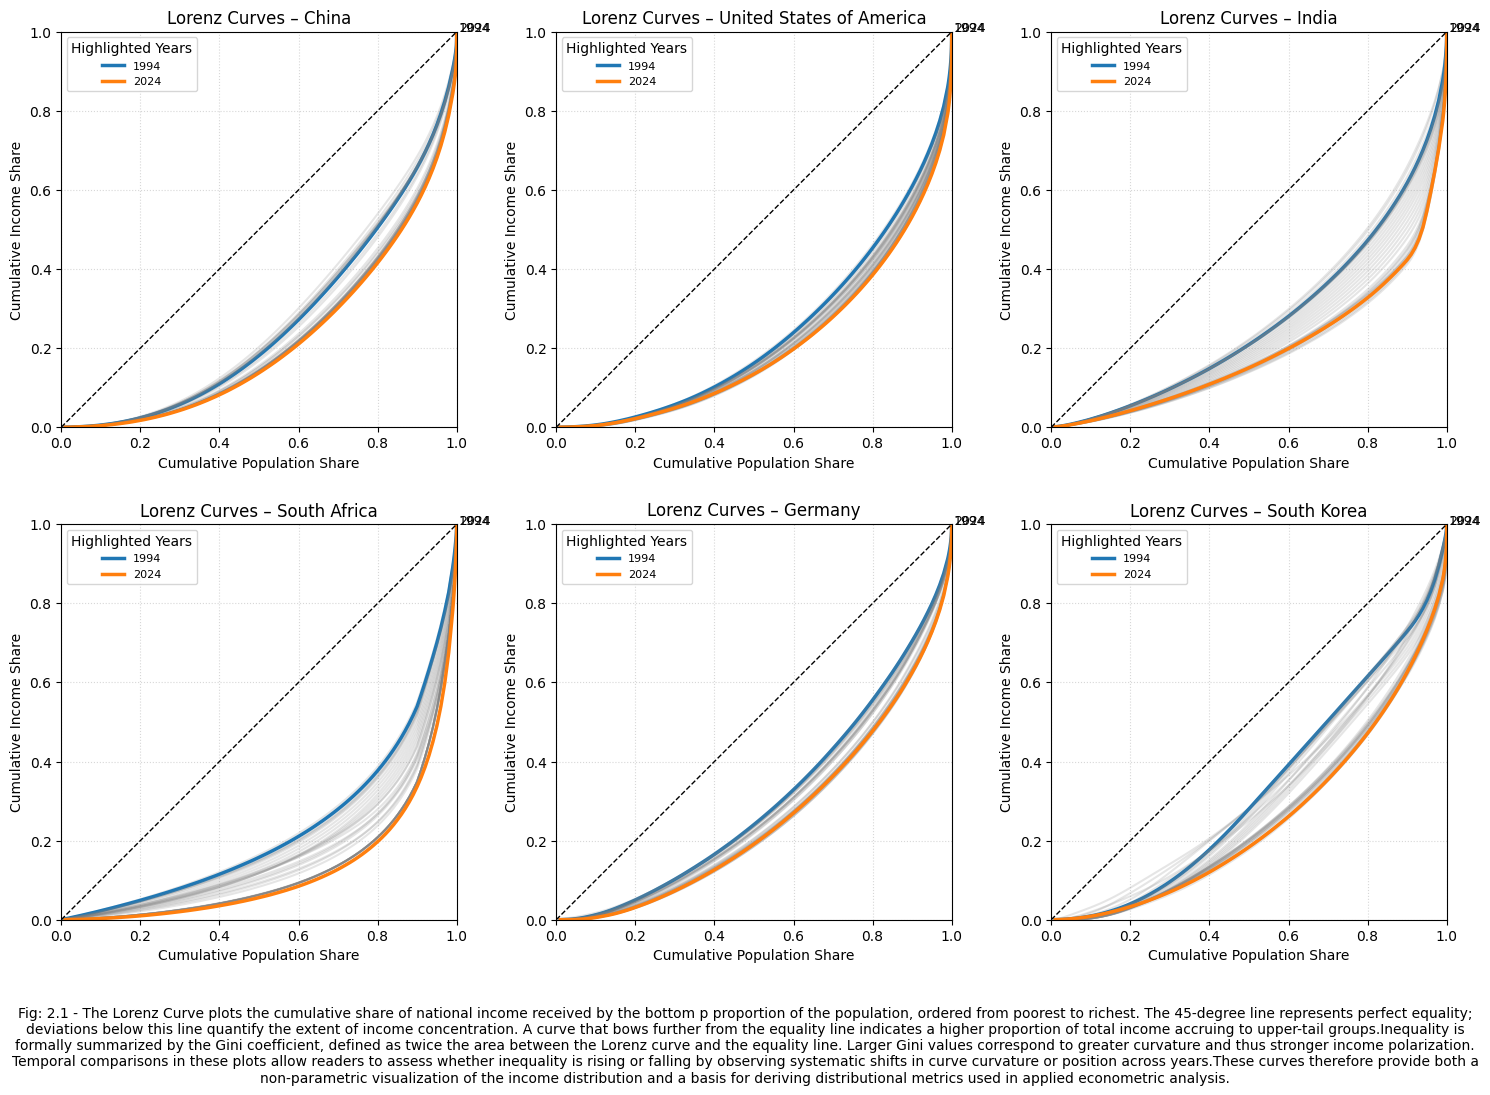

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 2. Parse percentile "p0p10" -> p_start=0, p_end=10  (kept for completeness)
def extract_bounds(s):
    s = s[1:]              # drop leading 'p'
    a, b = s.split('p')
    return float(a), float(b)

# 3. Keep only rows starting at 0% (these are cumulative bottom shares)
lorenz_points = income_df[income_df['p_start'] == 0].copy()

# 4. Convert to fractions 0–1
lorenz_points['cum_pop']    = lorenz_points['p_end'] / 100.0   # x-axis
lorenz_points['cum_income'] = lorenz_points['value']           # y-axis (already cumulative)

country_code = ['CN', 'US', 'IN', 'ZA', 'DE', 'KR']
country_mapping = {'CN' : 'China', 'DE': 'Germany', 'ZA': 'South Africa', 'IN': 'India', 'US': 'United States of America', 'KR': 'South Korea'}
# --- Create 2x3 grid of subplots ---
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, code in enumerate(country_code):
    ax = axes[i]

    # Years available for this country
    years = np.sort(lorenz_points[lorenz_points['country'] == code]['year'].unique())
    if len(years) == 0:
        continue

    # Highlight earliest and latest years
    first_year = 1994
    last_year  = 2024

    for year in years:
        df_cnt = lorenz_points[(lorenz_points['country'] == code) &
                               (lorenz_points['year'] == year)].sort_values('cum_pop')

        if year in (first_year, last_year):
            ax.plot(df_cnt['cum_pop'], df_cnt['cum_income'],
                    linewidth=2.5, label=f'{year}')
            # Label at end of curve
            ax.text(df_cnt['cum_pop'].iloc[-1] + 0.005,
                    df_cnt['cum_income'].iloc[-1],
                    str(year), fontsize=9)
        else:
            ax.plot(df_cnt['cum_pop'], df_cnt['cum_income'],
                    color="gray", alpha=0.2)

    # Perfect equality line
    ax.plot([0, 1], [0, 1], linestyle="--", color="black", linewidth=1)

    ax.set_title(f"Lorenz Curves – {country_mapping[code]}", fontsize=12)
    ax.set_xlabel("Cumulative Population Share")
    ax.set_ylabel("Cumulative Income Share")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')  # make each plot square

    ax.grid(True, linestyle=":", alpha=0.5)
    ax.legend(title="Highlighted Years", fontsize=8)

# Hide any unused subplots (in case fewer than 6 countries)
for j in range(len(country_code), len(axes)):
    fig.delaxes(axes[j])
fig.text(
    0.5, -0.02,
    (
        "Fig: 2.1 - The Lorenz Curve plots the cumulative share of national income received by the bottom p proportion of the population, "
        "ordered from poorest to richest. The 45-degree line represents perfect equality; deviations below this line quantify the extent of "
        "income concentration. A curve that bows further from the equality line indicates a higher proportion of total income accruing to upper-tail groups."

        "Inequality is formally summarized by the Gini coefficient, defined as twice the area between the Lorenz curve and the equality line. "
        "Larger Gini values correspond to greater curvature and thus stronger income polarization. Temporal comparisons in these plots allow "
        "readers to assess whether inequality is rising or falling by observing systematic shifts in curve curvature or position across years."

        "These curves therefore provide both a non-parametric visualization of the income distribution and a basis for deriving distributional metrics used in applied econometric analysis."
    ),
    ha='center', va='top', fontsize=10, wrap=True
)
plt.tight_layout()
plt.show()


## **Insights from Lorenz Curves Across Countries**

The Lorenz curves presented above illustrate how the distribution of national income evolves over time within each country.  
Several common patterns and country‐specific distinctions emerge:

- China: Curves bend strongly to the right, showing lasting inequality. Later curves move in a little, meaning only small improvements as income grows.
- United States: Curves stay steady and close together, showing inequality is stable with little change over time.
- India: Curves widen over the years, with recent ones bending more at the top, meaning richer groups gained more income.
- South Africa: Curves bend the most, showing very high inequality. Later curves shift only slightly, so inequality stays severe.
- Germany: Curves stay close to the equality line, with small changes, showing income growth is more balanced.
- South Korea: Curves slowly move closer to the equality line, showing income is shared more evenly over time.

---

### **General Interpretation**
Across all panels, an outward bow in the Lorenz curve reflects higher inequality, while inward shifts signal improvements in distributional balance.  
Temporal movement of each country’s curves thus provides a visual summary of how national income growth has been allocated across population groups, complementing formal inequality metrics such as the Gini coefficient.



### Visualize Income Share Trends Over Time

This cell generates stacked bar charts to visualize the trend of income shares (bottom 50%, top 10%, top 1%) over time for selected countries:
- It iterates through the specified `country_code` list.
- For each country, it filters `df_income_summary` for years from 1952 onwards and pivots the data to have years as the index and income distribution categories as columns.
- It then plots stacked bars where the `bottom_50%` share is plotted from 0, the `top_10%` is plotted from `1 - top10`, and `top_1%` is plotted from `1 - top1`.
- Custom colors are used to distinguish the different income groups.
- The y-axis is set from 0 to 1 (representing 0% to 100% of national income).
- Titles, labels, legend, and grid are added for clarity, and each plot is saved as a PNG image.

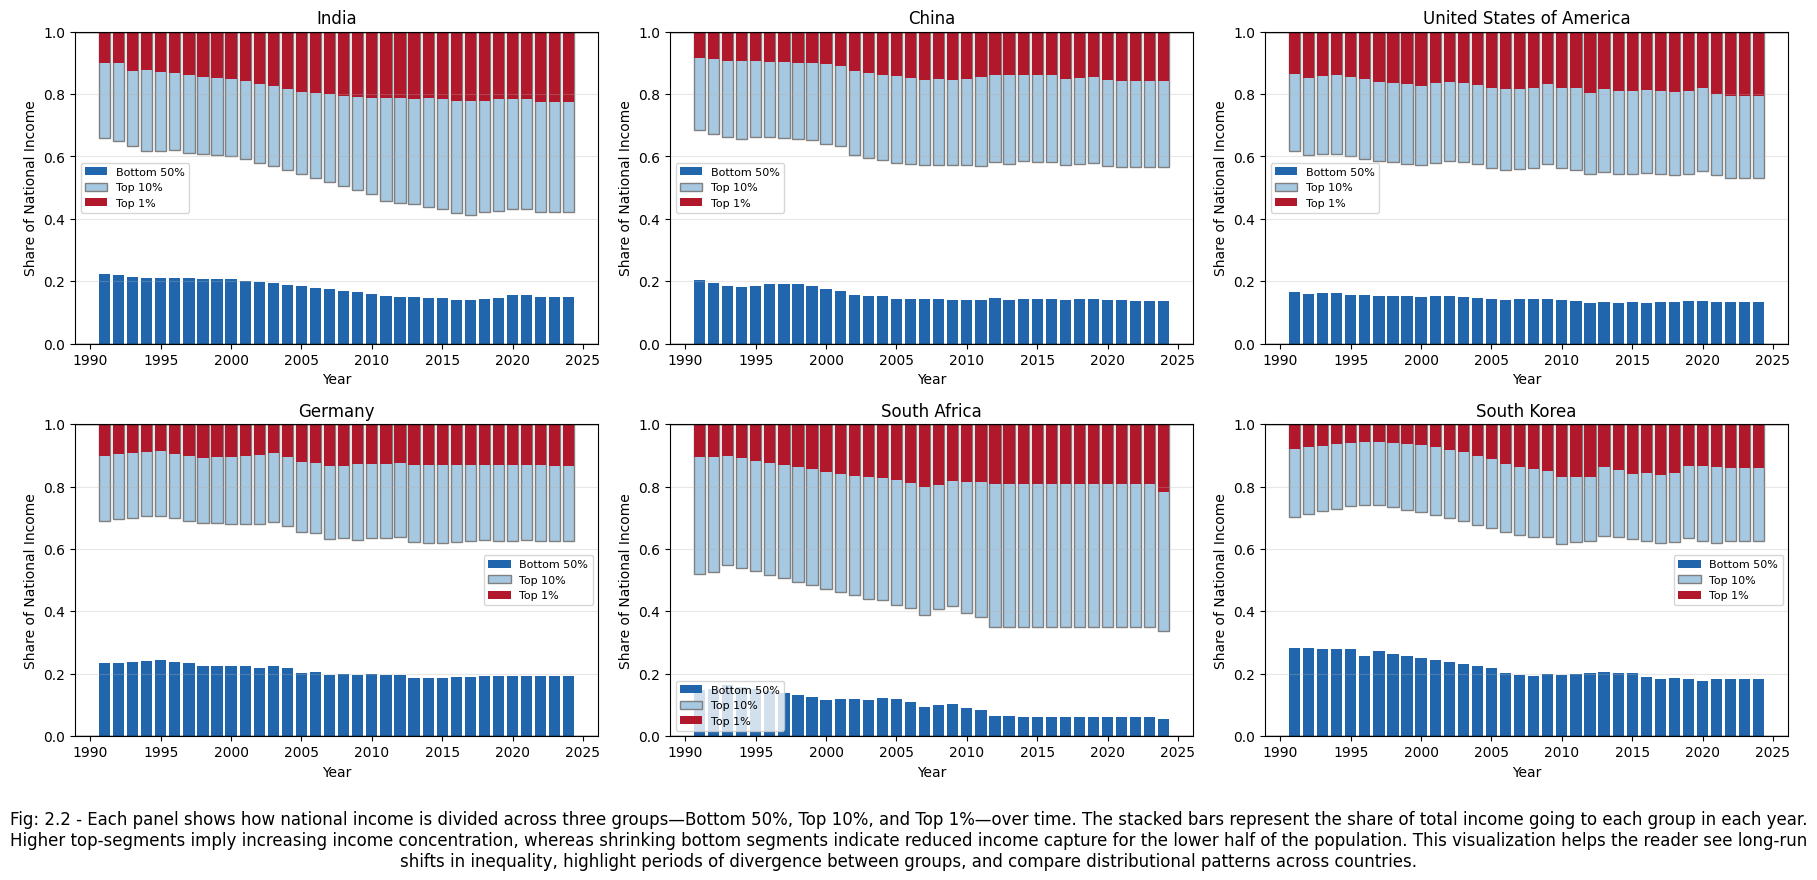

In [20]:
import matplotlib.pyplot as plt

bottom50_color = "#2166ac"   # blue
top10_color    = "#a6c8e0"   # light blue
top1_color     = "#b2182b"   # red

country_code = ['IN', 'CN', 'US', 'DE', 'ZA', 'KR']

# Create 2x3 grid of subplots (one will remain unused)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()

for i, code in enumerate(country_code):
    ax = axes[i]

    # Filter + pivot
    df_plot = df_income_summary[
        (df_income_summary['country'] == code) &
        (df_income_summary['year'] >= 1952)
    ]

    if df_plot.empty:
        ax.set_visible(False)
        continue

    df_country = df_plot.pivot(
        index='year',
        columns='income_distribution',
        values='value'
    )

    # Make sure required columns exist
    if not {'bottom_50%', 'top_10%', 'top_1%'}.issubset(df_country.columns):
        ax.set_visible(False)
        continue

    years    = df_country.index.values
    bottom50 = df_country['bottom_50%'].values
    top10    = df_country['top_10%'].values
    top1     = df_country['top_1%'].values

    # Bars
    ax.bar(years, bottom50, width=0.8, color=bottom50_color, label="Bottom 50%")
    ax.bar(years, top10,    width=0.8, bottom=1 - top10,
           color=top10_color, edgecolor='grey', label="Top 10%")
    ax.bar(years, top1,     width=0.8, bottom=1 - top1,
           color=top1_color, label="Top 1%")

    # Cosmetics
    ax.set_ylim(0, 1)
    ax.axhline(0, color='black', linewidth=1)
    ax.axhline(1, color='black', linewidth=1)

    ax.set_title(f"{country_mapping[code]}", fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("Share of National Income")
    ax.grid(axis='y', alpha=0.3)

    # Smaller legend per subplot
    ax.legend(fontsize=8)

# Hide any extra subplot (the 6th one)
for j in range(len(country_code), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.savefig("income_distribution_grid.png", dpi=300)
fig.text(
    0.5, -0.02,
    (
        "Fig: 2.2 - Each panel shows how national income is divided across three groups—Bottom 50%, Top 10%, and Top 1%—over time. "
        "The stacked bars represent the share of total income going to each group in each year. Higher top-segments imply increasing "
        "income concentration, whereas shrinking bottom segments indicate reduced income capture for the lower half of the population. "
        "This visualization helps the reader see long-run shifts in inequality, highlight periods of divergence between groups, and compare distributional patterns across countries."
    ),
    ha='center', va='top', fontsize=12, wrap=True
)
plt.show()


## **Additional Insights from Income Share Dynamics (Bottom 50%, Top 10%, Top 1%)**

The stacked income-share panels trace how national income is allocated across the Bottom 50%, Top 10%, and Top 1% over more than three decades.  
A number of cross-country themes and structural contrasts emerge from these trajectories:
- India: Income shifts toward upper groups over time. The Bottom 50% declines after 2000, while the Top 10% and Top 1% grow, showing rising inequality during high growth.
- China: Top income shares rise sharply in the 1990s and early 2000s, then stabilize. Inequality grows quickly during reforms but levels off later.
- United States: Distribution stays steady. The Bottom 50% remains low, while top groups hold high shares, showing persistent inequality without big changes.
- Germany: Distribution is more balanced. Small shifts in top groups, while the Bottom 50% stays stable, reflecting limited inequality growth.
- South Africa: Inequality is very high. The Bottom 50% holds little and shrinking income, while the Top 10% and Top 1% dominate throughout.
- South Korea: Gaps narrow over time. Top groups weaken slightly, while the Bottom 50% stabilizes, showing a move toward fairer distribution.

---

### **Overall Interpretation**
Together, these panels illustrate how inequality evolves not merely through abstract indices but through tangible shifts in the relative claims of different income groups.  
Declining Bottom 50% shares and expanding Top 1% bands highlight upward redistribution, whereas stable or converging segments point to more equitable growth.  
This decomposition complements the Lorenz-curve analysis by showing *which* groups drive changing inequality within each country.


### Merge Lorenz Points with Indicators and Calculate Shares

This cell integrates the `lorenz_points` DataFrame (used for plotting Lorenz curves) with the `indicators_df` DataFrame (containing macroeconomic indicators and adjusted income figures):
- The 'country' column in `lorenz_points` is renamed to 'country_code' for consistent merging.
- The two DataFrames are merged using a `left` join on `country_code` and `year`, ensuring all Lorenz points are retained.
- New columns `population_share` and `net_income_share` are calculated by multiplying the respective cumulative values by total population and real national income.
- The head of the `df_all` DataFrame is displayed to show the merged data and new share calculations.

In [21]:
lorenz_points.rename(columns={'country': 'country_code'}, inplace=True)
df_all = lorenz_points.merge(indicators_df, how='left', on=['country_code', 'year'])
df_all['population_share'] = df_all['population']*df_all['cum_pop']
df_all['net_income_share'] = df_all['national_income_real_usd']*df_all['value']
df_all[df_all['year']==2024].head()

,country_code,variable,percentile,year,value,age,pop,p_start,p_end,cum_pop,...,inflation_factor,cpi_index,cpi_base,national_income_per_adult_nominal,net_income_real_local,national_income_real_usd,net_income_ppp,net_income_usd_fx,population_share,net_income_share
33,IN,sptincj999,p0p1,2024,0.0008,999,j,0.0,1.0,0.01,...,1.04953,10.80753,1.626036,2657.700725,399.861679,5.801736e+11,1636.343566,4.779074,1.450936e+07,4.641389e+08
67,IN,sptincj999,p0p10,2024,0.0164,999,j,0.0,10.0,0.10,...,1.04953,10.80753,1.626036,2657.700725,399.861679,5.801736e+11,1636.343566,4.779074,1.450936e+08,9.514847e+09
101,IN,sptincj999,p0p100,2024,1.0000,999,j,0.0,100.0,1.00,...,1.04953,10.80753,1.626036,2657.700725,399.861679,5.801736e+11,1636.343566,4.779074,1.450936e+09,5.801736e+11
135,IN,sptincj999,p0p11,2024,0.0187,999,j,0.0,11.0,0.11,...,1.04953,10.80753,1.626036,2657.700725,399.861679,5.801736e+11,1636.343566,4.779074,1.596029e+08,1.084925e+10
169,IN,sptincj999,p0p12,2024,0.0210,999,j,0.0,12.0,0.12,...,1.04953,10.80753,1.626036,2657.700725,399.861679,5.801736e+11,1636.343566,4.779074,1.741123e+08,1.218365e+10


### Plot Lorenz Curves with Adjusted Net Income

This cell generates Lorenz curves for selected countries, but this time using the newly calculated `net_income_share` from the `df_all` DataFrame:
- It iterates through a predefined list of `country_code`s (`CN`, `US`, `DE`, `IN`, `ZA`).
- For each country, it sorts the data by `population_share`.
- Lorenz curves are plotted for all available years, with `first_year` (2024) and `last_year` (1995) highlighted with thicker lines and text labels. Intermediate years are shown with muted gray lines and smaller labels.
- A dashed black line representing perfect equality is included as a reference.
- Titles, labels, legend, and grid are added for clarity, and each plot is saved as a PNG image, visualizing the distribution of *adjusted net income*.

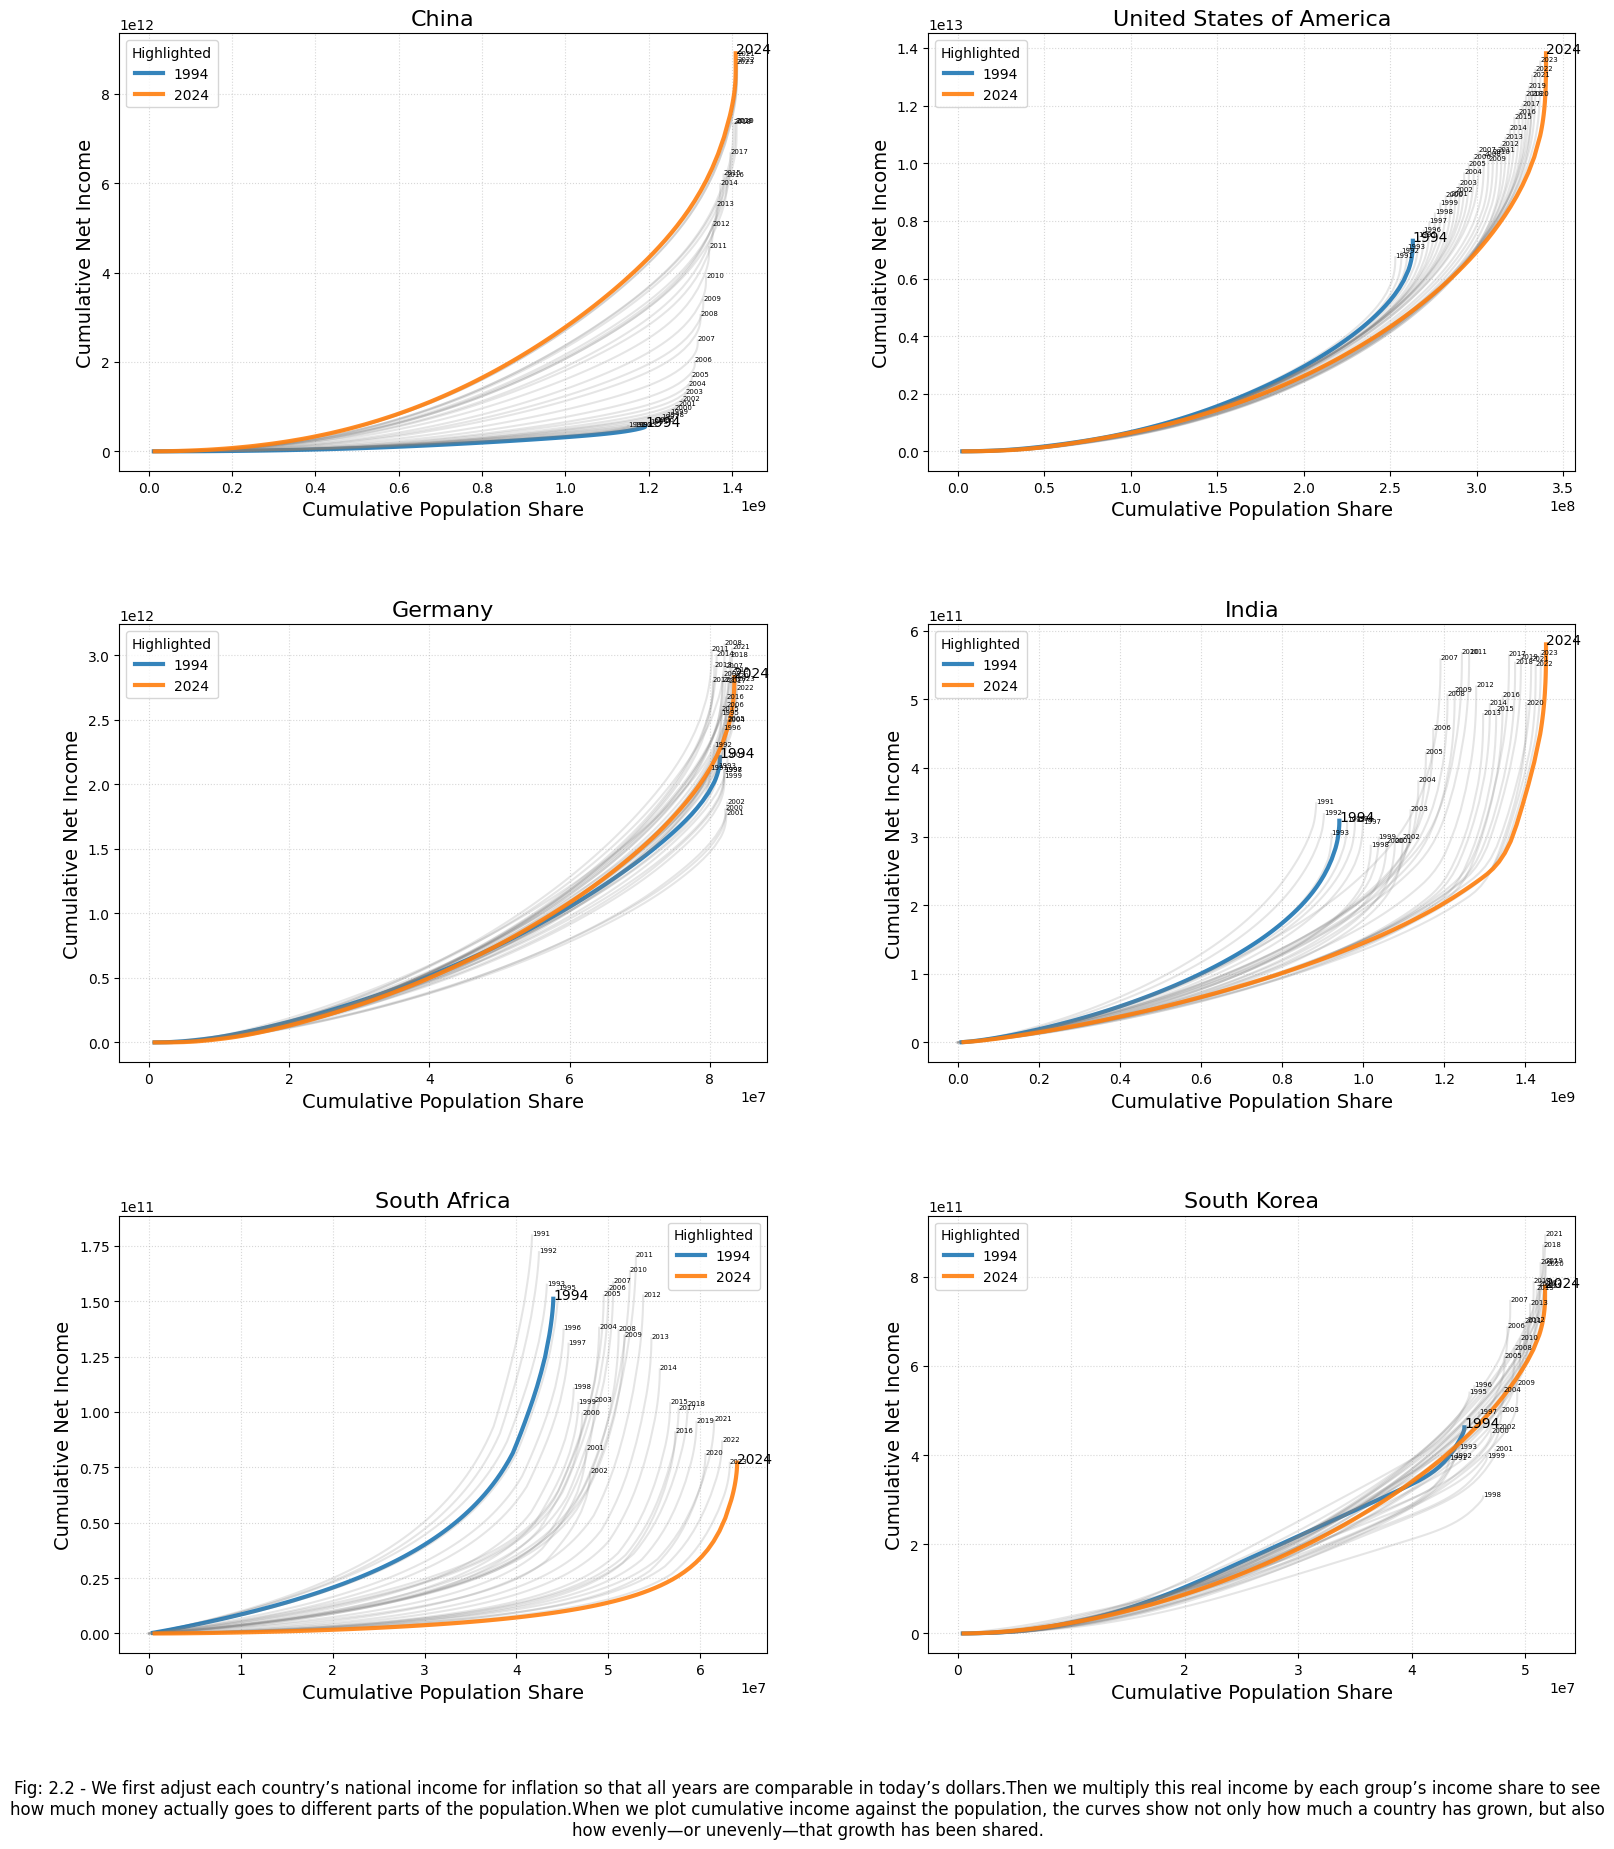

In [22]:
import matplotlib.pyplot as plt
import numpy as np

country_code = ['CN', 'US', 'DE', 'IN', 'ZA', 'KR']

# --- Create 3x2 grid of subplots ---
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()
for i, code in enumerate(country_code):
    ax = axes[i]

    df_c = df_all[df_all['country_code'] == code].copy()
    years = sorted(df_c['year'].unique())

    if len(years) == 0:
        ax.set_visible(False)
        continue

    first_year = max(years)     # 2024
    last_year = 1994      # 1994 or whatever exists

    for year in years:
        df_cnt = df_c[df_c['year'] == year].sort_values('population_share')

        if df_cnt.empty:
            continue

        x = df_cnt['population_share']
        y = df_cnt['net_income_share']

        # highlight
        if year in [first_year, last_year]:
            ax.plot(x, y, linewidth=3, label=str(year), alpha=0.9)
            # Add year label at end of curve
            ax.text(df_cnt['population_share'].iloc[-1] - 0.005,
                    df_cnt['net_income_share'].iloc[-1],
                    str(year), fontsize=10)

        else:
            ax.plot(x, y, color="gray", alpha=0.2)
            ax.text(df_cnt['population_share'].iloc[-1] + 0.005,
                    df_cnt['net_income_share'].iloc[-1],
                    str(year), fontsize=5)

    # Equality line
    ax.plot([0,1], [0,1], "--", color="black", linewidth=1)

    ax.set_title(f"{country_mapping[code]}", fontsize=16)
    ax.set_xlabel("Cumulative Population Share", fontsize=14)
    ax.set_ylabel("Cumulative Net Income", fontsize=14)

    ax.grid(True, linestyle=":", alpha=0.5)
    ax.legend(title="Highlighted", fontsize=10)
# Hide any extra subplot (6th one)
for j in range(len(country_code), len(axes)):
    axes[j].set_visible(False)

# Fix spacing
plt.subplots_adjust(
    hspace=0.35,
    wspace=0.25,
    left=0.07,
    right=0.98,
    top=0.95,
    bottom=0.05
)
fig.text(
    0.5, -0.02,
    (
        "Fig: 2.2 - We first adjust each country’s national income for inflation so that all years are comparable in today’s dollars."
    "Then we multiply this real income by each group’s income share to see how much money actually goes to different parts of the population."
    "When we plot cumulative income against the population, the curves show not only how much a country has grown, but also how evenly—or unevenly—that growth has been shared."
    ),
    ha='center', va='top', fontsize=12, wrap=True
)
plt.show()


## **Insights from Net-Income Lorenz Mass Curves**

Across countries, several patterns emerge:

- China Curves rise sharply over time, showing rapid income growth but gains concentrated among higher-income groups.
- United States Curves shift upward moderately and stay stable, with persistent top concentration and little overall change.
- Germany Curves move up gradually with modest bends, reflecting balanced growth and a stable inequality profile.
- India Curves widen as growth rises, with later years showing stronger gains for upper-income groups and rising inequality.
- South Africa Curves show extreme inequality, with top groups holding most income and lower groups gaining very little.
- South Korea Curves expand upward but stay compressed, showing broad income growth with less polarization over time.

### **General Interpretation**

Upward shifts indicate real income growth, while the *shape* of each curve reflects how evenly (or unevenly) that growth is distributed across the population. Steeper late-distribution segments imply upper-tail concentration, whereas more gradual slopes reflect wider sharing of national gains. Together, these curves provide a dynamic, non-parametric visualization of income evolution, complementing formal measures such as Gini coefficients and top-share statistics.



### Visualize Correlation Matrices per Country

Now we will display correlation matrices for the numerical features within `df_merge`, separately for each country

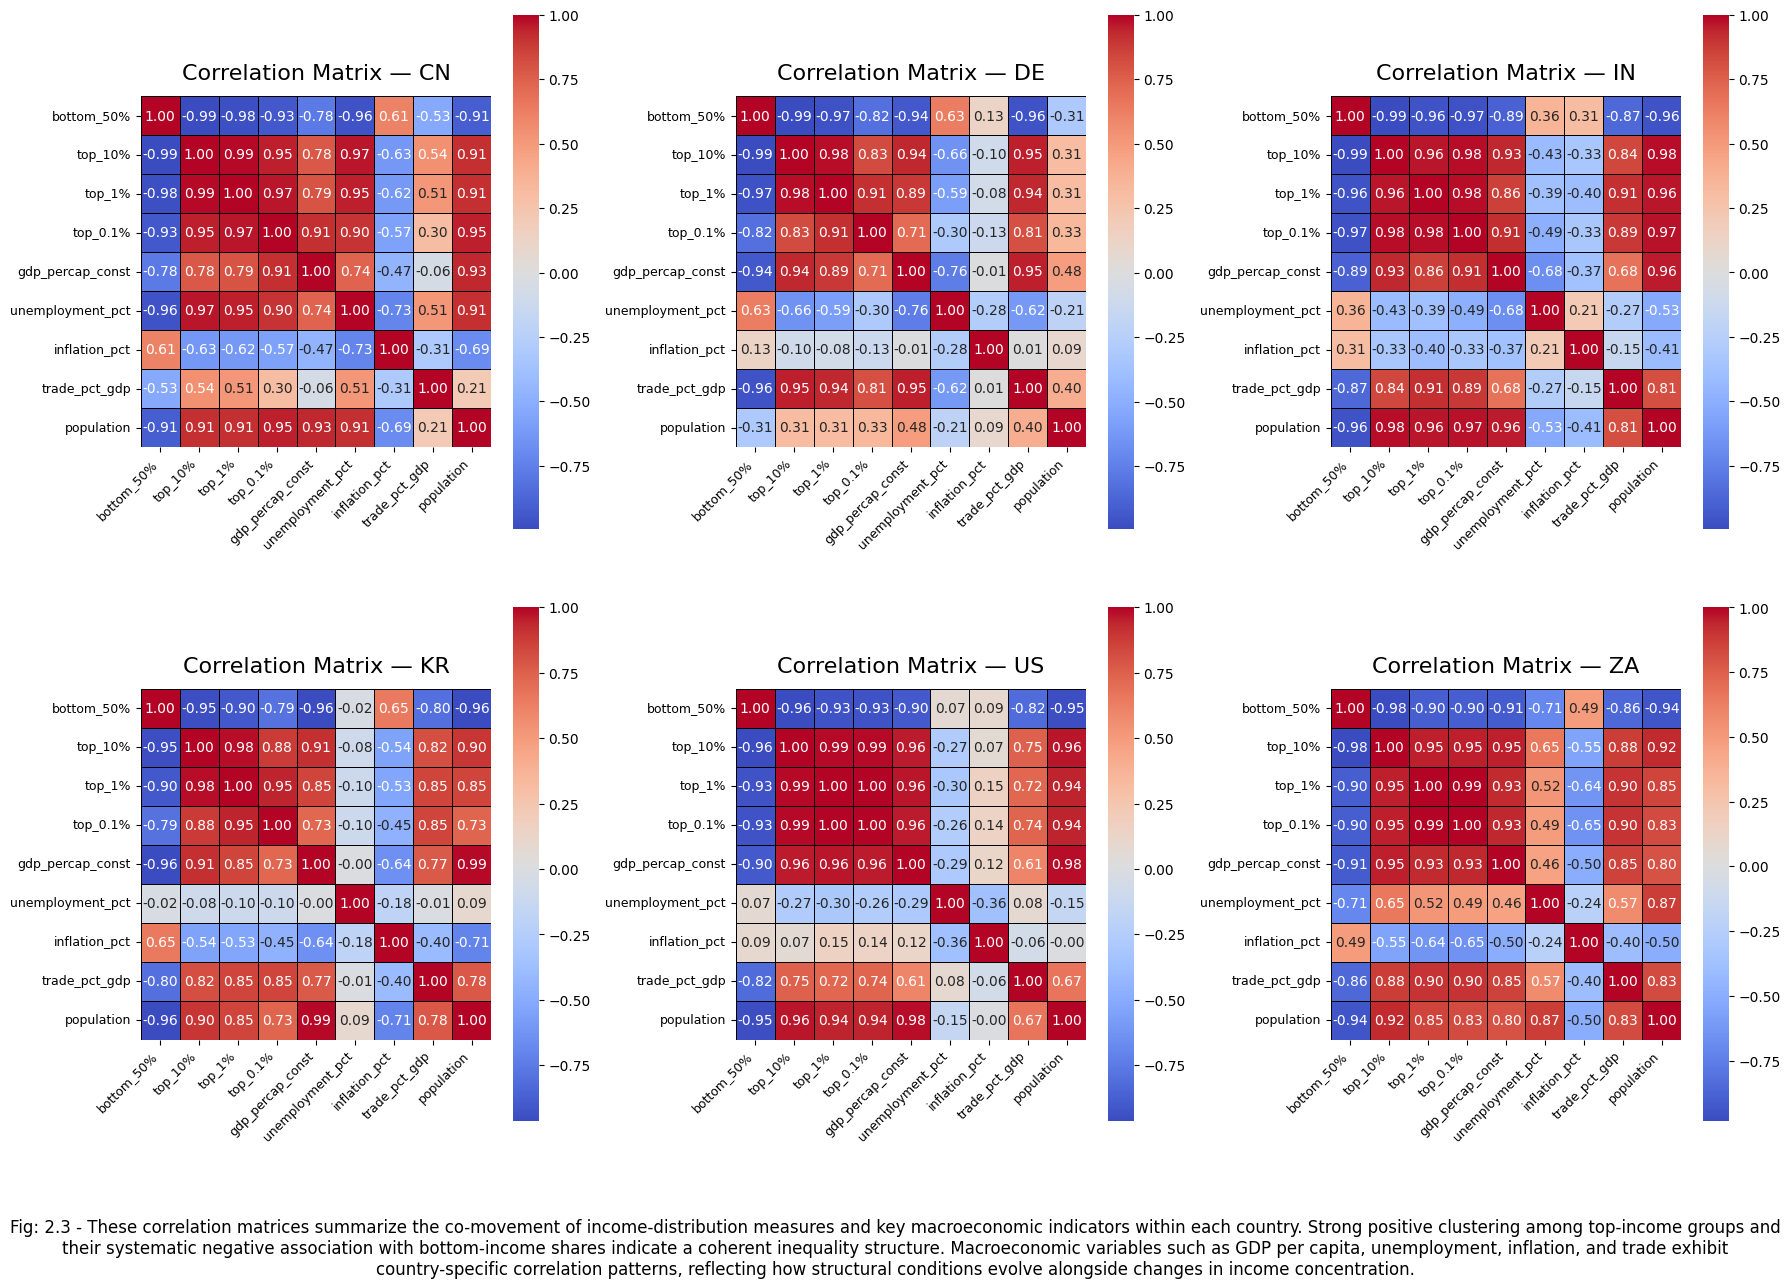

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_consider = [
    'bottom_50%', 'top_10%', 'top_1%', 'top_0.1%',
    'gdp_percap_const', 'unemployment_pct',
    'inflation_pct', 'trade_pct_gdp', 'population',
    'country_code'
]

df_merge = df_merge[features_to_consider]

# --- Create 2×3 grid ---
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

countries = df_merge['country_code'].unique()

for ax, code in zip(axes, countries):

    # Filter one country
    df_corr = df_merge[df_merge['country_code'] == code].drop(columns='country_code')

    # Draw heatmap on the correct axis
    sns.heatmap(
        df_corr.corr(),
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        cbar=True,
        ax=ax,
        square=True,
        linewidths=0.5,
        linecolor='black',
        annot_kws={"size": 10}
    )

    ax.set_title(f'Correlation Matrix — {code}', fontsize=16, pad=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=9)

# Hide unused axes if fewer than 6 slots
for j in range(len(countries), len(axes)):
    axes[j].set_visible(False)
fig.text(
    0.5, -0.02,
    (
        "Fig: 2.3 - These correlation matrices summarize the co-movement of income-distribution measures and key "
        "macroeconomic indicators within each country. Strong positive clustering among top-income groups "
        "and their systematic negative association with bottom-income shares indicate a coherent inequality "
        "structure. Macroeconomic variables such as GDP per capita, unemployment, inflation, and trade "
        "exhibit country-specific correlation patterns, reflecting how structural conditions evolve alongside "
        "changes in income concentration."
    ),
    ha='center', va='top', fontsize=12, wrap=True
)
plt.tight_layout()
plt.savefig("correlation_grid.png", dpi=300, bbox_inches='tight')
plt.show()


### **Insights from Correlation Matrices Across Countries**

The matrices show how income-distribution indicators align with macroeconomic variables across six economies:

1. **Positive Association Among Top Groups**  
   Top 10%, 1%, and 0.1% shares are highly correlated (>0.90), moving together as upper-tail gains rise.

2. **Negative Link Between Top and Bottom Shares**  
   Bottom 50% share is strongly negatively correlated (–0.90 to –0.99) with upper-tail measures, reflecting a trade-off in distribution.

3. **Country-Specific Macroeconomic Patterns**  
   - **GDP per capita**: Positively linked with top shares in emerging economies.  
   - **Unemployment**: Negatively tied to bottom shares, positively to top shares.  
   - **Inflation**: Mixed effects—sometimes raising inequality, sometimes reducing it.  
   - **Trade openness**: Often moderately positive with top shares, showing global market integration benefits upper groups.

4. **Mixed Population Effects**  
   Population correlations vary, reflecting different demographic-economic interactions.

---

### **Overall Interpretation**
Two key features emerge:  
(1) inequality dynamics are coherent—top groups rise together, bottom shares fall;  
(2) macroeconomic factors interact with inequality in **distinct, country-specific ways**, shaped by structural conditions and policies.

These patterns help interpret inequality trends seen in Lorenz curves and income-share plots.

# Train and Evaluation

Train a Linear Regression model for each country, evaluate performance, and visualize results including coefficients.


### Prepare Data for Regression Analysis

Now we will prepare the DataFrame for linear regression modeling:

In [24]:
countries_to_analyze = ['CN', 'IN', 'US', 'DE', 'ZA', 'KR']
feature_cols = ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct', 'inflation_pct']
target_col = 'top_10%'

# Filter for selected countries
df_ml = df_merge[df_merge['country_code'].isin(countries_to_analyze)].copy()

# Drop rows with missing values in features or target
df_ml = df_ml.dropna(subset=feature_cols + [target_col])

print(f"Shape of prepared data: {df_ml.shape}")
df_ml.head()

Shape of prepared data: (204, 10)


,bottom_50%,top_10%,top_1%,top_0.1%,gdp_percap_const,unemployment_pct,inflation_pct,trade_pct_gdp,population,country_code
0,0.2027,0.3150,0.0842,0.0328,989.548541,2.37,24.256990,25.872981,1150780000,CN
1,0.1939,0.3271,0.0885,0.0343,1117.273295,2.37,24.256990,30.034094,1164970000,CN
2,0.1849,0.3390,0.0929,0.0359,1258.349461,2.69,24.256990,35.908642,1178440000,CN
3,0.1811,0.3433,0.0954,0.0371,1406.858457,2.90,24.256990,35.605464,1191835000,CN
4,0.1849,0.3390,0.0938,0.0365,1545.194294,3.00,16.791225,34.104952,1204855000,CN


### Hypothesis Testing for Linear Regression Models

To conduct a more formal hypothesis test on the significance of each feature's coefficient, we will use the `statsmodels` library. This library provides a comprehensive summary of the regression results, including p-values for each coefficient, which helps determine if there is a statistically significant relationship between the feature and the target variable.

In [25]:
import statsmodels.api as sm

# Iterate through each country to perform OLS regression and hypothesis testing
for country in countries_to_analyze:
    print(f"--- Hypothesis Testing for {country} ---")

    # Filter data for the current country
    country_df = df_ml[df_ml['country_code'] == country]
    print(len(country_df))

    # Define features and target
    X = country_df[feature_cols]
    y = country_df[target_col]

    # Add a constant to the independent variable for the intercept term
    X = sm.add_constant(X)

    # Create and fit the OLS model
    model_sm = sm.OLS(y, X).fit()

    # Print the summary of the regression results
    print(model_sm.summary())
    print("\n" + "="*80 + "\n")

--- Hypothesis Testing for CN ---
34
                            OLS Regression Results                            
Dep. Variable:                top_10%   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     368.9
Date:                Sat, 13 Dec 2025   Prob (F-statistic):           2.06e-24
Time:                        03:29:18   Log-Likelihood:                 128.79
No. Observations:                  34   AIC:                            -247.6
Df Residuals:                      29   BIC:                            -239.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
con

## Concluding Analysis of Hypothesis Test

Models show strong explanatory power (R² > 0.96 for China, India, US, South Africa), but variable impacts differ.

**Consistent Drivers of Top Income Share:**

- **GDP per capita** is a strong predictor, especially in India and South Africa, with positive coefficients tied to rising inequality.  
- **Trade % of GDP** often correlates positively, showing openness and trade benefit top earners, notably in China and the US.

**Varying and Complex Relationships:**

- **Unemployment %**: In China, India, South Africa, higher unemployment links to *increased* top 10% share. In the US, it correlates with a *decrease*, reflecting different structures and safety nets.  
- **Inflation %**: Mostly non-significant in China, India, US, but negative in South Africa, suggesting inflation can reduce top income share.

**Key Takeaways and Confidence:**

GDP per capita, trade, and unemployment significantly affect top 10% income share (p < 0.05, often p < 0.001).  
Multicollinearity cautions against isolating exact effects, as these factors often move together.

### Define Feature Exclusion Map Based on Hypothesis Testing

We will create a dictionary `exclusion_map` that specifies which features should be excluded from the linear regression models for each country. This decision is based on the p-values obtained from the previous OLS regression (hypothesis testing)

This step aims to simplify the models and retain only statistically significant predictors for each country before training the final models.

In [26]:
# P-value thresholds for exclusion (based on previous OLS summary)
# Features with p-value > 0.1 will be excluded for each country
exclusion_map = {
    'CN': ['inflation_pct'],
    'IN': ['inflation_pct'],
    'US': ['inflation_pct'],
    'DE': ['gdp_percap_const'],
    'KR': ['unemployment_pct','inflation_pct'],
    'ZA': ['trade_pct_gdp']
}

### Train and Evaluate Linear Regression Models per Country

Now we iterate through each country to train and evaluate a Linear Regression model for predicting the `top_10%` income share, excluding features deemed insignificant in the hypothesis test.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import statsmodels.api as sm

models = {}
plot_data = [] # List to store data for plotting

# Iterate through each country
for country in countries_to_analyze:
    print(f"--- Analysis for {country} ---")

    # Filter data for the current country
    country_df = df_ml[df_ml['country_code'] == country]

    # Check if there is enough data points
    if len(country_df) < 5:
        print(f"Not enough data to train model for {country} (n={len(country_df)})")
        continue

    # Determine which features to use based on p-value exclusion
    features_to_exclude = exclusion_map.get(country, [])
    current_feature_cols = [f for f in feature_cols if f not in features_to_exclude]

    if not current_feature_cols:
        print(f"No features left for {country} after exclusion. Skipping model training.")
        continue

    # Define features and target
    X = country_df[current_feature_cols]
    y = country_df[target_col]

    print(f"Using features for {country}: {current_feature_cols}")

    # Initialize and fit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    models[country] = model

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.6f}")
    print(f"R-squared: {r2:.4f}")

    # Coefficients
    coef_df = pd.DataFrame({
        'Feature': current_feature_cols,
        'Coefficient': model.coef_
    })
    print("\nModel Coefficients:")
    display(coef_df)

    # Store data for plotting later
    plot_data.append({
        'country': country,
        'y_test': y_test,
        'y_pred': y_pred
    })
    print("\n" + "="*40 + "\n")

--- Analysis for CN ---
Using features for CN: ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct']
Mean Squared Error: 0.000048
R-squared: 0.9318

Model Coefficients:


,Feature,Coefficient
0,trade_pct_gdp,0.013220
1,gdp_percap_const,0.017057
2,unemployment_pct,0.018498




--- Analysis for IN ---
Using features for IN: ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct']
Mean Squared Error: 0.000122
R-squared: 0.9712

Model Coefficients:


,Feature,Coefficient
0,trade_pct_gdp,0.023966
1,gdp_percap_const,0.077769
2,unemployment_pct,0.024035




--- Analysis for US ---
Using features for US: ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct']
Mean Squared Error: 0.000027
R-squared: 0.8102

Model Coefficients:


,Feature,Coefficient
0,trade_pct_gdp,0.006127
1,gdp_percap_const,0.018620
2,unemployment_pct,-0.001969




--- Analysis for DE ---
Using features for DE: ['trade_pct_gdp', 'unemployment_pct', 'inflation_pct']
Mean Squared Error: 0.000030
R-squared: 0.9231

Model Coefficients:


,Feature,Coefficient
0,trade_pct_gdp,0.025945
1,unemployment_pct,-0.005731
2,inflation_pct,-0.004694




--- Analysis for ZA ---
Using features for ZA: ['gdp_percap_const', 'unemployment_pct', 'inflation_pct']
Mean Squared Error: 0.000117
R-squared: 0.9476

Model Coefficients:


,Feature,Coefficient
0,gdp_percap_const,0.054228
1,unemployment_pct,0.019174
2,inflation_pct,-0.007630




--- Analysis for KR ---
Using features for KR: ['trade_pct_gdp', 'gdp_percap_const']
Mean Squared Error: 0.000335
R-squared: 0.7474

Model Coefficients:


,Feature,Coefficient
0,trade_pct_gdp,0.011201
1,gdp_percap_const,0.029843


Analyzing the MSE and R^2, the models perform exceptionally well for China, India, US, Germany, and South Africa, as indicated by their low MSE and high R-squared values, and reasonably well for Korea, which means they are good at predicting changes in the top_10% income share based on the chosen economic indicators.

## Further Evaluation of Models: Actual vs. Predicted Plots

These plots visualize the performance of our Linear Regression models for each country. For each graph:

*   **X-axis (Actual Top 10% Share)**: Represents the true 'top 10%' income share values from the test dataset.
*   **Y-axis (Predicted Top 10% Share)**: Shows the 'top 10%' income share values predicted by our trained model.
*   **Blue Dots**: Each dot corresponds to an actual data point from the test set, with its predicted value on the Y-axis.
*   **Red Dashed Line**: This diagonal line represents a 'perfect prediction' scenario, where `Actual = Predicted`. The closer the blue dots are to this red line, the better the model's accuracy.

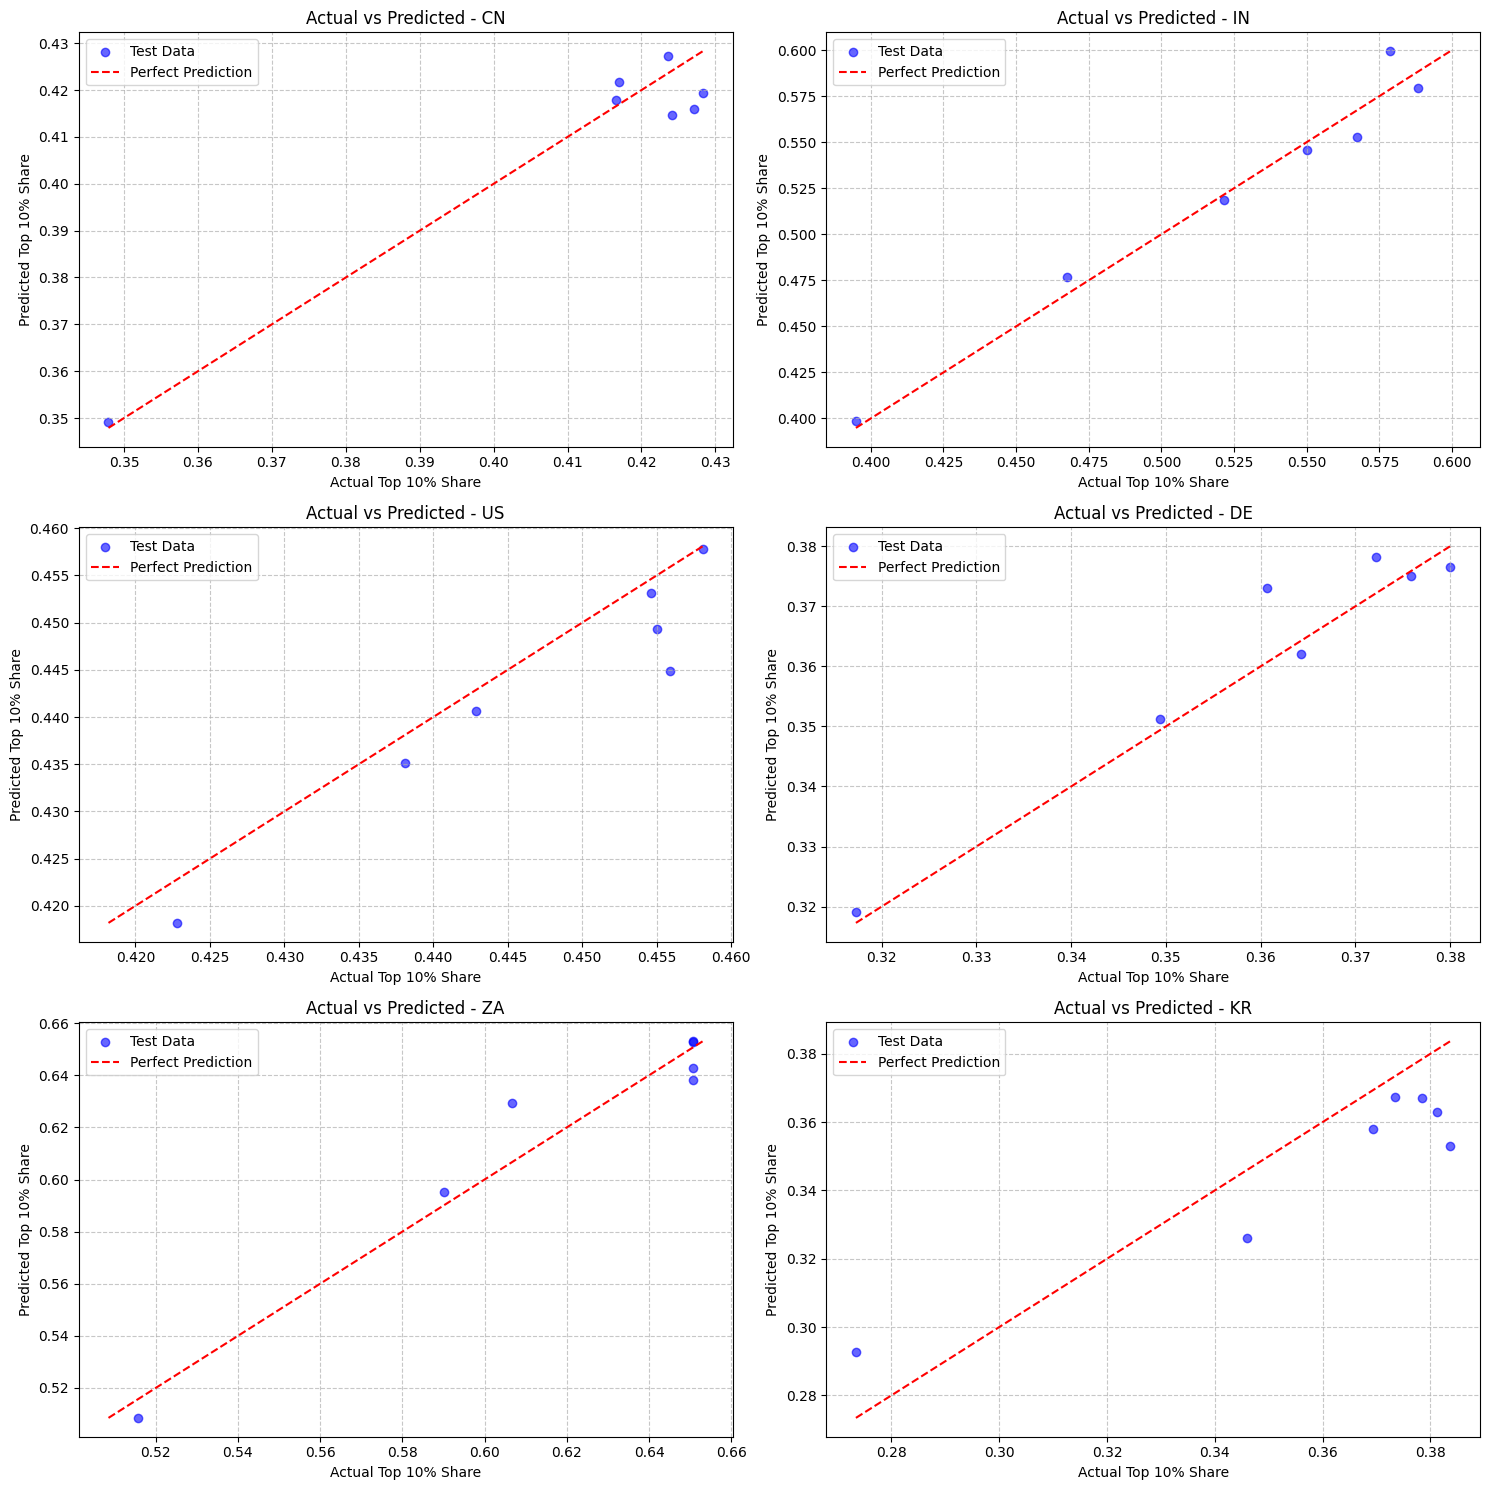

In [28]:
# Plot of 'Actual vs Predicted' graph of the countries
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, data in enumerate(plot_data):
    ax = axes[i]
    country = data['country']
    y_test = data['y_test']
    y_pred = data['y_pred']

    ax.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Test Data')

    # Plot diagonal line for reference
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

    ax.set_xlabel('Actual Top 10% Share')
    ax.set_ylabel('Predicted Top 10% Share')
    ax.set_title(f'Actual vs Predicted - {country}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Conclusion**: Leveraging the Model for Policy-Making to Combat Inequality

Our analysis and the developed Linear Regression models provide a powerful tool for understanding and simulating the proportion of wealth held by the top 10% richest individuals, which serves as a key indicator of income inequality within a country. By identifying the significant economic drivers—such as GDP per capita, trade percentage of GDP, and unemployment rates—these models offer a data-driven lens into the mechanisms that influence income concentration.


**Governments can utilize these models for:**

1.  **Forecasting Inequality Trends**: By inputting projected values for economic indicators, policymakers can simulate potential future scenarios for Wealth Inequality which allows governments to anticipate rising inequality and proactive policy interventions.
2.  **Impact Assessment of Economic Policies**: Before implementing new economic policies, their potential impact on income inequality can be assessed.
3.  **Targeted Interventions**: Helps understand which economic factors drive inequality in a country (determined by model's coeff & p-values) & enables govts. to design more effective interventions. For example, if unemployment significantly exacerbates the top 10% share (as in China, India, and SA), policies focused on job creation and social safety nets become critical.
4.  **Evidence-Based Decision Making**: By demonstrating the quantitative relationship between macroeconomic factors and income concentration, governments can advocate for policies with a clearer understanding of their expected outcomes.